In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import pandas as pd
import numpy as np
import sys

In [61]:
#Importing data file and selecting relevant variables

data=pd.read_csv("../IMDb/IMDb.csv")
data.drop('id', axis=1)

feature_cols=['castTotalLikes','directorLikes','actor1likes','movieLikes','fbPosters','year','duration','genre','contentRating','criticReviews','userReviews','userVotes','rating']
data=data[feature_cols]
data.head()

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,Action,PG-13,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,Action,PG-13,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,Action,PG-13,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,Action,PG-13,813.0,2701.0,1144337,8.5
4,143,131.0,131.0,0,0.0,NaN,NaN,Documentary,NaN,NaN,NaN,8,7.1


In [62]:
#Summary of missing values
data.isnull().sum()

castTotalLikes      0
directorLikes     104
actor1likes         7
movieLikes          0
fbPosters          13
year              108
duration           15
genre               0
contentRating     303
criticReviews      50
userReviews        21
userVotes           0
rating              0
dtype: int64

In [63]:
data=data.dropna()
data.describe().round(1)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,criticReviews,userReviews,userVotes,rating
count,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0,4641.0
mean,10212.4,723.1,6883.4,7991.4,1.4,2002.1,108.8,148.9,291.4,89859.8,6.4
std,17929.4,2883.5,14600.7,19831.7,2.0,12.5,22.2,121.1,386.2,142162.3,1.1
min,0.0,0.0,0.0,0.0,0.0,1916.0,20.0,1.0,1.0,6.0,1.6
25%,1576.0,9.0,656.0,0.0,0.0,1999.0,94.0,61.0,80.0,11798.0,5.8
50%,3317.0,54.0,1000.0,181.0,1.0,2005.0,104.0,120.0,173.0,39956.0,6.5
75%,14638.0,212.0,12000.0,6000.0,2.0,2010.0,118.0,204.0,346.0,104481.0,7.2
max,656730.0,23000.0,640000.0,349000.0,43.0,2016.0,330.0,813.0,5060.0,1689764.0,9.3


In [64]:
#Prepare datasets for Hypothesis Testing with significance threshold of 0.1
#if pvalue>0.1 then there is no statistical difference between the two samples

c1=data[data.year <= 1990]
c2=data[data.year > 1990]
from scipy import stats
stats.ttest_ind(c1['rating'],c2['rating'])

Ttest_indResult(statistic=12.486499362595312, pvalue=3.2389794818634726e-35)

In [65]:
data.to_csv("IMDb1.csv", sep=',', encoding='utf-8')

#assigning numeric values to columns with 'object' data type

data=pd.read_csv("../IMDb/IMDb2.csv")
data=data.drop('id', axis=1)
data.shape

(4641, 13)

In [66]:
data.corr().round(3)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
castTotalLikes,1.000,0.122,0.947,0.216,0.086,0.127,0.130,-0.079,-0.115,0.265,0.205,0.269,0.100
directorLikes,0.122,1.000,0.095,0.161,-0.043,-0.060,0.177,0.007,-0.018,0.177,0.219,0.295,0.180
actor1likes,0.947,0.095,1.000,0.141,0.064,0.100,0.093,-0.059,-0.088,0.194,0.146,0.198,0.089
movieLikes,0.216,0.161,0.141,1.000,0.011,0.238,0.214,-0.082,-0.095,0.690,0.391,0.530,0.261
fbPosters,0.086,-0.043,0.064,0.011,1.000,0.062,0.022,-0.035,-0.046,-0.033,-0.072,-0.027,-0.072
year,0.127,-0.060,0.100,0.238,0.062,1.000,-0.127,-0.037,-0.338,0.319,0.017,0.027,-0.214
duration,0.130,0.177,0.093,0.214,0.022,-0.127,1.000,-0.100,-0.035,0.245,0.353,0.341,0.363
genre,-0.079,0.007,-0.059,-0.082,-0.035,-0.037,-0.100,1.000,0.183,-0.081,-0.104,-0.123,-0.009
contentRating,-0.115,-0.018,-0.088,-0.095,-0.046,-0.338,-0.035,0.183,1.000,-0.124,-0.101,-0.098,0.142
criticReviews,0.265,0.177,0.194,0.690,-0.033,0.319,0.245,-0.081,-0.124,1.000,0.594,0.614,0.342


In [67]:
#drop variable 'actor1likes' since 'actor1likes-movieLikes' are highly correlated
data=data.drop('actor1likes', axis=1)

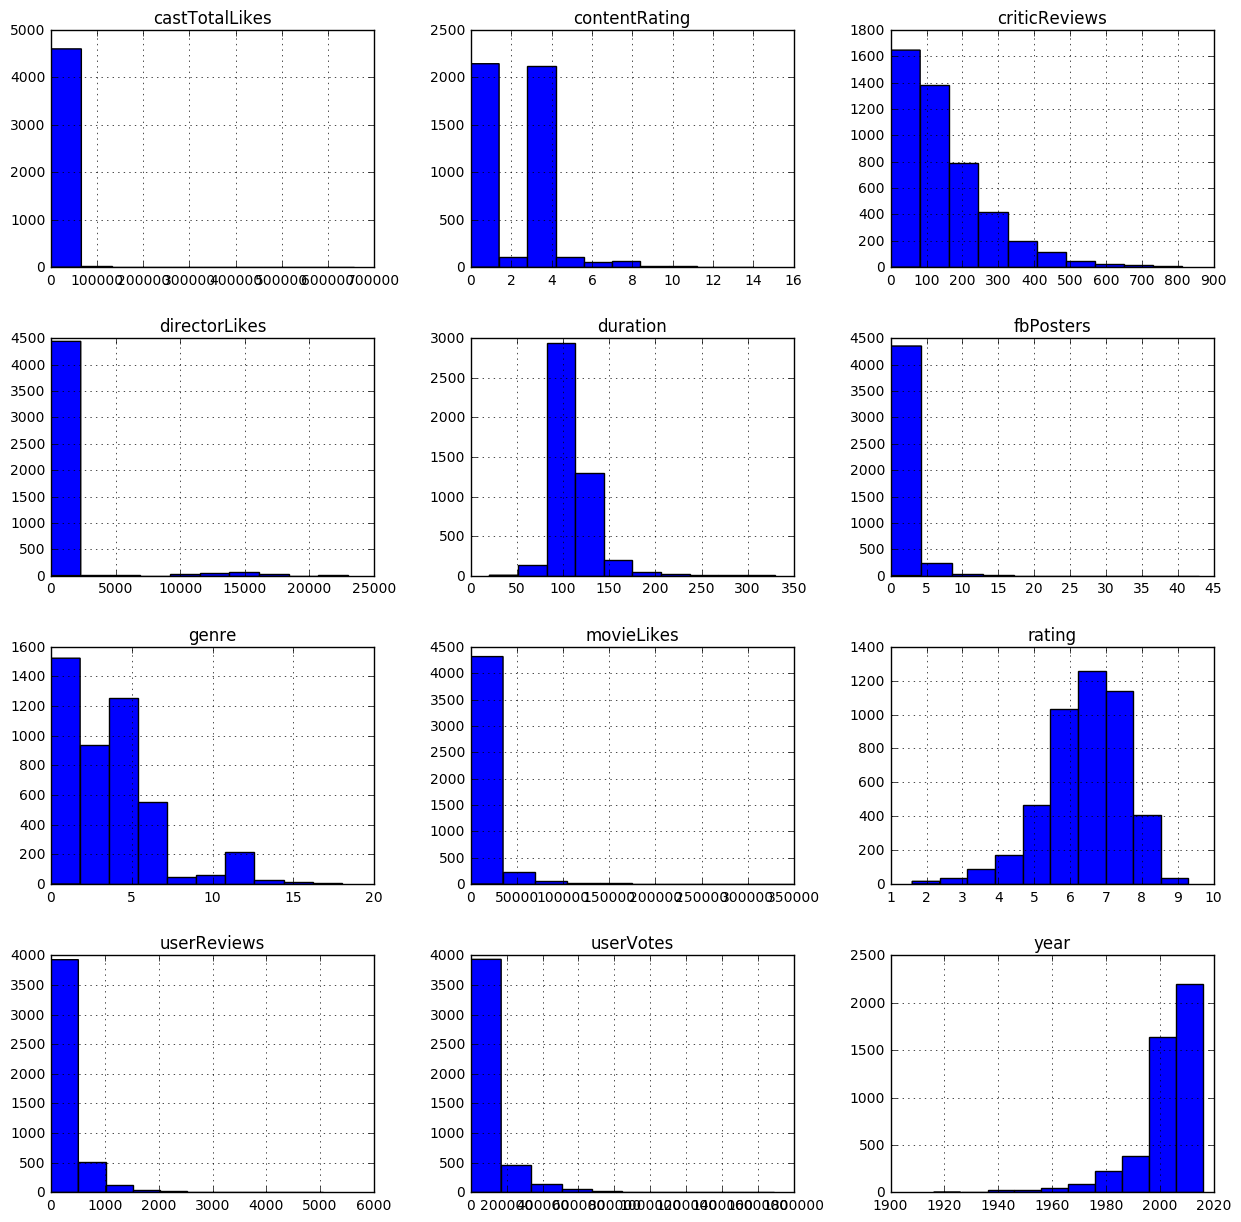

In [68]:
#Variables have roughly the same scale and unit, hence the need for Pre-Processing is eliminated
pd.DataFrame.hist(data, figsize = [15,15]);

In [69]:
#Run Linear Regression Model

In [70]:
#Linear model was cross validated for different combination of variables and the least significant variables were dropped
#Model with the least AIC and highest R-squared is selected

x=data.drop(['rating','movieLikes','directorLikes','genre','castTotalLikes'], axis=1)
y=data.rating

In [71]:
#Splitting the data into Training and Test set
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.40)
print (X_train.shape) 
print (y_train.shape) 
print (X_test.shape) 
print (y_test.shape)

(2784, 7)
(2784,)
(1857, 7)
(1857,)


In [72]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train)
results=model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.876e+04
Date:                Thu, 30 Mar 2017   Prob (F-statistic):               0.00
Time:                        16:50:54   Log-Likelihood:                -3768.6
No. Observations:                2784   AIC:                             7551.
Df Residuals:                    2777   BIC:                             7593.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
fbPosters        -0.0420      0.009     -4.642

In [73]:
#Calculating difference between Predicted and Actual Ratings

pred=results.predict(X_test)

h=pd.DataFrame(pred)
h=h.round(1)
g=pd.DataFrame(y_test)
g=g.reset_index(drop=True)
h['rating']=g
h.columns=['pred','actual']
h['difference']=round(abs(h.pred-h.actual),2)
h[:1]

,pred,actual,difference
0,6.9,8.1,1.2


In [74]:
#Optimizing model to achieve a mean score of difference variable close to 0.5

round(h.difference.mean(),4)

0.6982

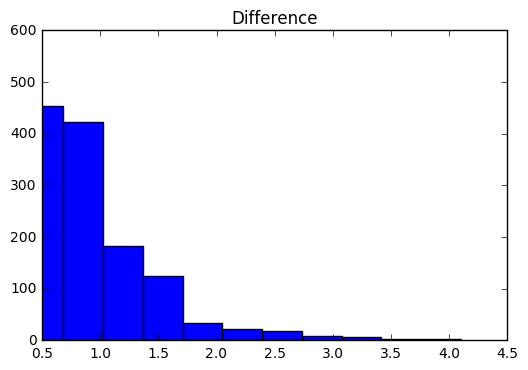

In [75]:
plt.hist(h.difference,bins=12)
plt.xlim(0.5,)
plt.title("Difference")

In [78]:
print("Predictions within +/-1.0 star: %f"%((h.difference<1.1).sum()))
print('Total Predictions:              %f'%(h.difference).count())
print ('Accuracy for Linear Regression: %f'%(((h.difference<1.1).sum())/(h.difference.count())))

Predictions within +/-1.0 star: 1459.000000
Total Predictions:              1857.000000
Accuracy for Linear Regression: 0.785676


In [79]:
#Run KNN CLassifier Model

In [80]:
#Binning 'Ratings' variable into groups

h=data
bins=[0.0,3.0,5.0,7.5,10.0]
groups=['D','C','B','A']
h['categories']=pd.cut(h.rating,bins,labels=groups)

x=h.drop(['rating','categories'], axis=1)
y=h.categories

In [81]:
#Splitting data into Training and Test set

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.40)
print (X_train.shape) 
print (y_train.shape) 
print (X_test.shape) 
print (y_test.shape)

(2784, 11)
(2784,)
(1857, 11)
(1857,)


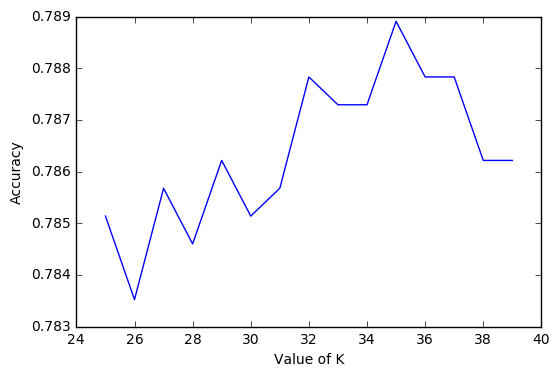

In [82]:
#Cross Validating model performance for range of 'K' neighbours

k_range=range(25,40)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    z=metrics.accuracy_score(y_test,pred)
    k_scores.append(z)

plt.plot(k_range,k_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [83]:
k_scores=pd.DataFrame(k_scores)
print('Maximum Accuracy for KNN: %f'%k_scores.max())

Maximum Accuracy for KNN: 0.788907
